# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [67]:
# Load pickled data
import pickle
import numpy as np
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"
csv_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    class_names = dict(reader)
    class_names.pop('ClassId')
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [51]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

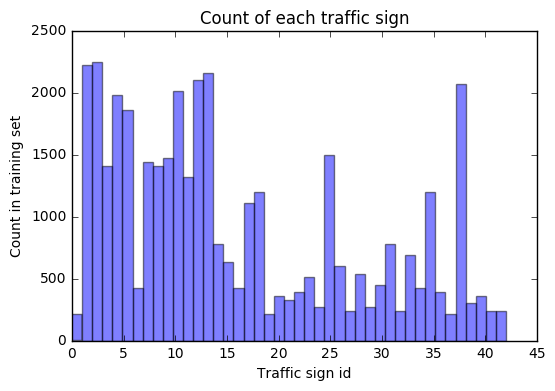

In [52]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Class distribution
plt.hist(y_train,n_classes,alpha=0.5)
plt.title("Count of each traffic sign")
plt.xlabel("Traffic sign id")
plt.ylabel("Count in training set")

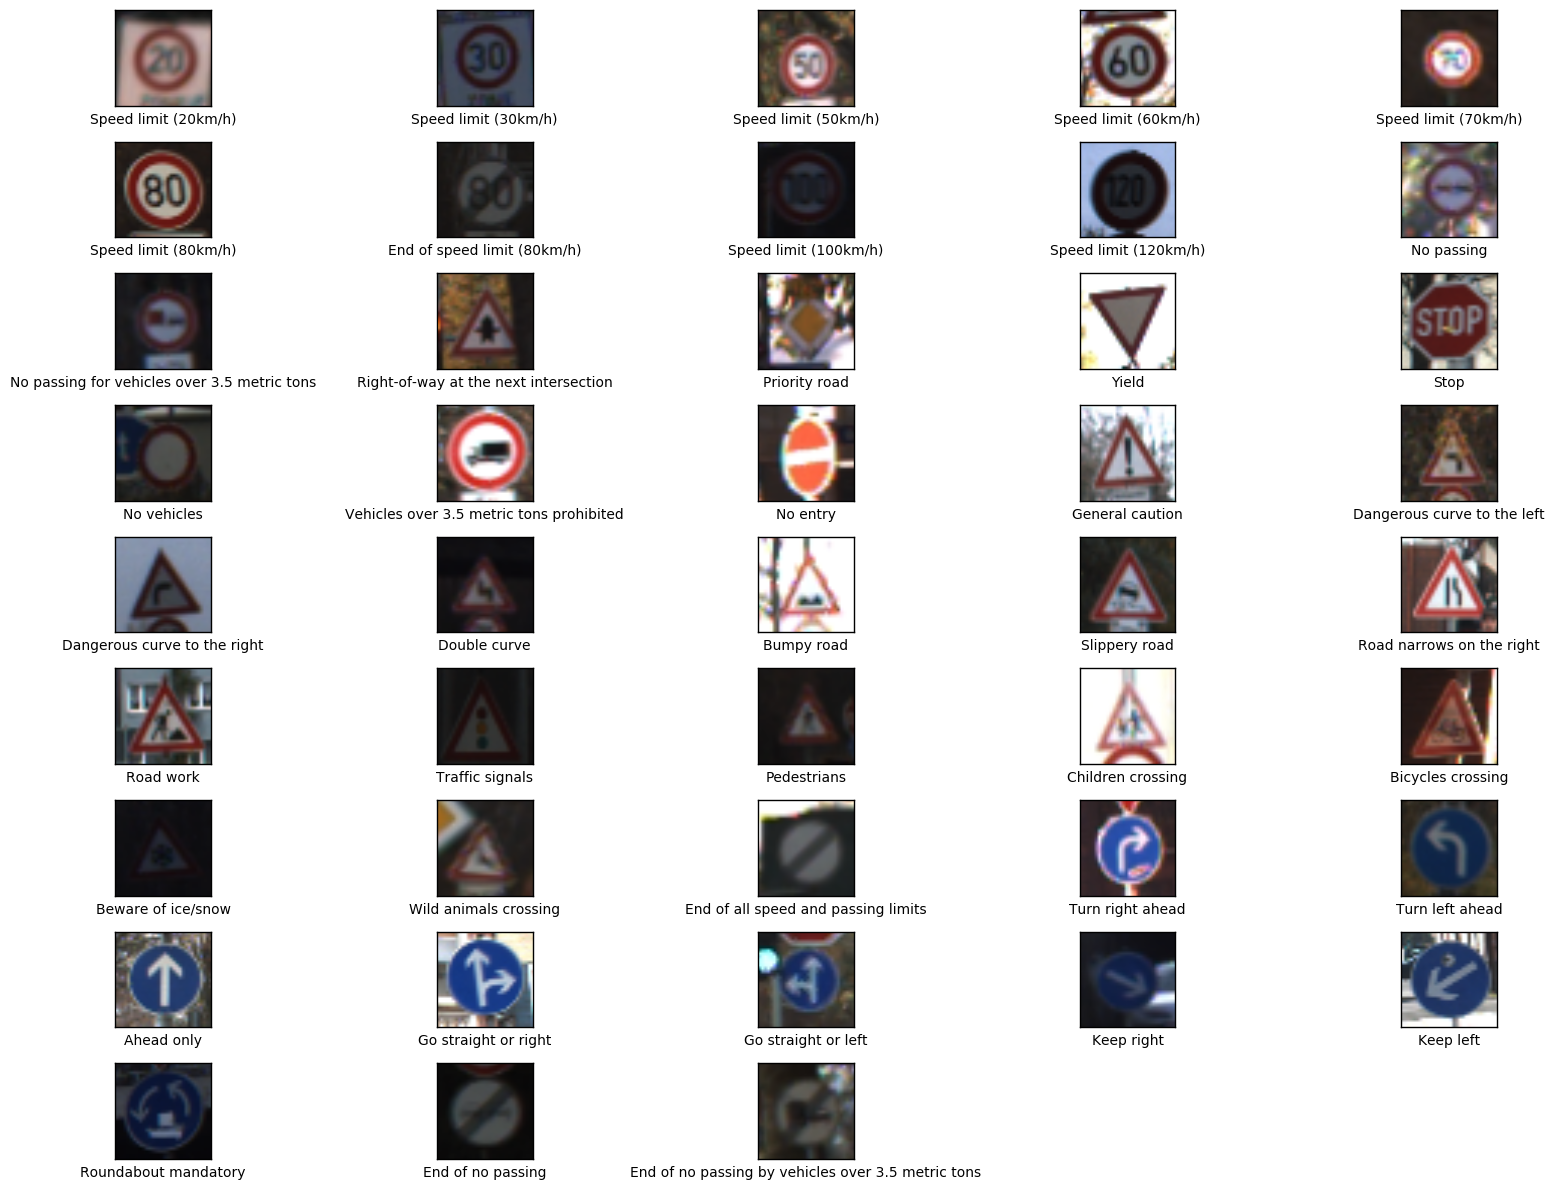

In [53]:
# Visualize the data - One per sign
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_images = []
indexes = []
for clazz in range(n_classes):
    idx = np.random.choice(np.where(y_train==clazz)[0])
    sample_images.append(X_train[idx])
    indexes.append(idx)
    
plt.figure(figsize=(16, 12))
for i, img in enumerate(sample_images):
    plt.subplot(9, 5, i+1)
    plt.imshow(img)
    plt.xlabel(class_names[str(i)])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline
# http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
# IDEAS: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
class Transform():
    
    def __init__(self):
        pass
    
    def apply(self):
        pass
    
class Grayscale(Transform):
    
    def apply(self, img):
        width, weight, depth = img.shape
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).reshape(width,weight,1)
    
    def toString(self):
        return '{}'.format('Grayscale')
    
class Normalizer(Transform):

    def apply(self, img):
        return ((img - 128.0)/128.)
    
    def toString(self):
        return '{}'.format('Normalize')
    
class Preprocess(Transform):
    
    def __init__(self, transforms):
        self.transforms = transforms

    def apply(self, img):
        for trans in self.transforms:
            img = trans.apply(img)
        return img
    
    def applies(self, X_train):
        return np.array([self.apply(x) for x in X_train])

""" Rotate the image by the specified angle
"""
class Rotate(Transform):
    def __init__(self, angle=None):
        self.angle = angle
    
    def apply(self, img):
        rows, cols, depth = img.shape
        M = cv2.getRotationMatrix2D((cols/2,rows/2), self.getAngle(),1)
        return cv2.warpAffine(img, M,(cols,rows))
    
    def getAngle(self):
        if self.angle is None:
            return np.random.randint(-15, 15)
        return self.angle
    
    def toString(self):
        return '{} by {}'.format('Rotate', self.angle)
    
""" Translate the image by x & y
"""
class Translate(Transform):
    def __init__(self, by_x=None, by_y=None):
        self.by_x = by_x
        self.by_y = by_y
    
    def apply(self, img):
        rows, cols, depth = img.shape
        M = np.float32([[ 1, 0, self.getX()],[ 0, 1, self.getY()]])
        return cv2.warpAffine(img,M,(cols,rows))
    
    def getX(self):
        if self.by_x is None:
            return np.random.randint(-2, 2)
        return self.by_x
    
    def getY(self):
        if self.by_y is None:
            return np.random.randint(-2, 2)
        return self.by_y

    def toString(self):
        return '{} by X {} by Y {}'.format('Translate', self.by_x, self.by_y)
    
class Identity(Transform):
    
    def apply(self, img):
        return img

    def toString(self):
        return '{}'.format('Identity')

class Skew(Transform):
    
    def __init__(self, pts1, pts2):
        self.pts1 = pts1
        self.pts2 = pts2
    
    def apply(self, img):
        M = cv2.getPerspectiveTransform(self.pts1, self.pts2)
        dst = cv2.warpPerspective(img,M,(32,32))
        return dst
    
    def toString(self):
        return '{}'.format('Skew')

""" Scale the image by 
"""
class Scale(Transform):
    def apply(self, img):
        return cv2.resize(img, None, fx=ratio, fy=ratio, interpolation = cv2.INTER_CUBIC)

""" Blur images
"""
class GuassianBlur(Transform):
    
    def __init__(self, radius=None):
        self.radius = radius
        
    def apply(self, img):
        return cv2.GaussianBlur(img,(self.getRadius(), self.getRadius()),0)
    
    def getRadius(self):
        if self.radius is None:
            return np.random.choice([3, 5, 7])
        return self.radius
    
    def toString(self):
        return '{}'.format('Guassian Blur')

class Sampler():
    
    def __init__(self, transforms=[]):
        self.transforms = transforms
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train 
        self.freq = Stats.frequencies(self.y_train)
        self.class_mean = np.mean([val for val in self.freq.values()])
        self.class_std = np.std([val for val in self.freq.values()])

        total = np.sum([val for val in self.freq.values()])
        self.prob = np.array([val/total for val in self.freq.values()])
    
    def generate(self, X_train, y_train): 
        self.fit(X_train, y_train)
        
        std_mean = self.class_mean + self.class_std
        classes = np.where([ self.freq[i] for i in range(43) ] < std_mean)[0]
        if len(self.transforms) == 0:
            self.X_train = X_train
            self.y_train = y_train
            return
        for clazz in classes:
            while(Stats.frequencies(self.y_train)[clazz] < std_mean):
                for trans in self.transforms:
                    indexes = np.random.choice(np.where(y_train==clazz)[0], 10)
                    x = [ trans.apply(X_train[idx]) for idx in indexes ]
                    y = y_train[indexes]
                    self.X_train = np.append(self.X_train, x, axis=0)
                    self.y_train = np.append(self.y_train, y, axis=0)
                
    
class Stats():
    @staticmethod
    
    def frequencies(x):
        n_classes = set(x)
        return { clazz : len(np.where(x == clazz)[0]) for clazz in n_classes }   

def plot_distribution(y_train, n_classes):
    plt.hist(y_train,n_classes,alpha=0.5)
    plt.title("Count of each traffic sign")
    plt.xlabel("Traffic sign id")
    plt.ylabel("Count in training set")
    
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black") 

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_softmax(indexes):
    f = plt.figure(figsize=(12, 9))
    for i, idx in enumerate(indexes):
        img = X_test[idx]
        gimg = preproc.apply(img)

        ax = f.add_subplot(len(indexes), 2, 2*(i+1)-1)
        ax.imshow(img)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.xlabel(class_names.get(str(y_test[idx])))
        plt.tight_layout()

        ax = f.add_subplot(len(indexes), 2, 2*(i+1))
        ax.barh(top_k, values[idx], align='center')
        plt.yticks(top_k, [class_names.get(str(indices[idx][k])) for k in top_k])
        
        for k in top_k:
            if int(indices[idx][k]) == int(y_test[idx]):
                ax.get_children()[k].set_color('g')
        
        plt.tight_layout()
    
def load(fpath):
    with open(fpath, mode='rb') as f:
        return pickle.load(f)
    
def save(obj, fpath):
    with open(fpath, mode='wb') as f:
        pickle.dump(obj, f)

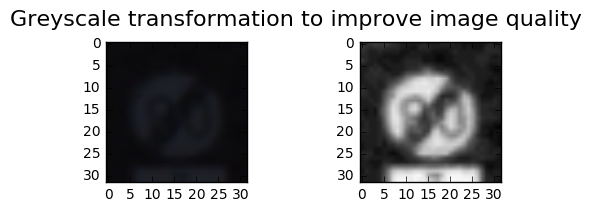

In [55]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Gray scale transformation
preproc = Preprocess([Grayscale(), Normalizer()])

plt.figure()
plt.suptitle('Greyscale transformation to improve image quality', fontsize=16)
img = X_train[10000]
plt.subplot(2, 2, 1)
plt.imshow(img)

plt.subplot(2, 2, 2)
gimg = preproc.apply(img)
plt.imshow(gimg.reshape(32, 32), cmap='gray')
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

As far as preprocessing is concerned, I am using 2 transformations:
- Grayscale trasnformation: which transform the RGB data into grayscale. The idea behind using grayscale was to improve the brightness of some of the darker images. In the figure above [80mph speed limit], for instance, applying a grayscale transform clarify the images to be more human readable. Also, we don't need to different the different color to classify traffic sign because they are design to accomodate color blind people. 

- Normalization transformation: I am scaling the color space from 0-255 to -1 to 1. It will help the optimizer to converge quicker and more efficiently as mentioned in the lecture.

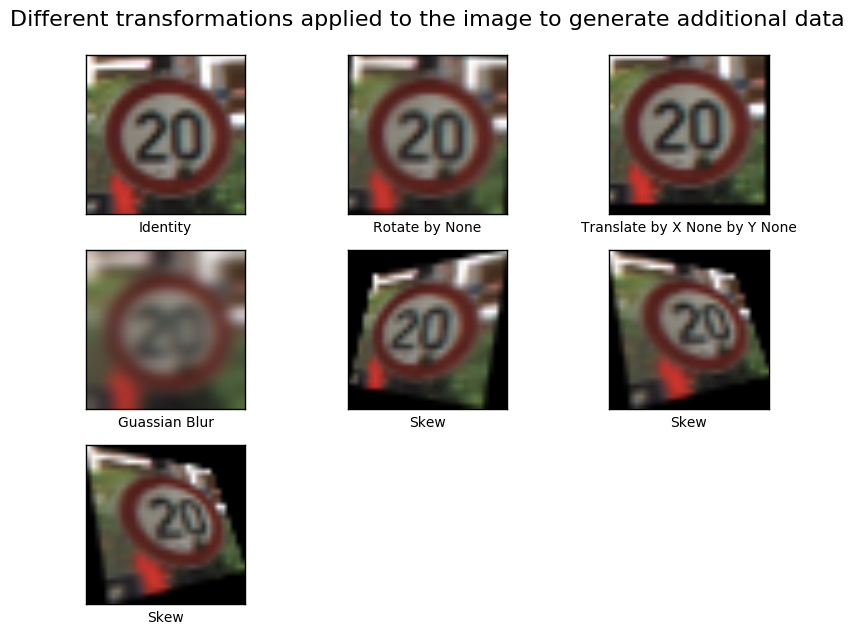

In [56]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
transforms = [
    Identity(),  # Just copy the image --- no transformation
    Rotate(),
    Translate(),
    GuassianBlur(),
    Skew(np.float32([[0,0],[32,0],[0,32],[32,32]]), np.float32([[5,5],[32,0],[0,27],[27,32]])),
    Skew(np.float32([[0,0],[32,0],[0,32],[32,32]]), np.float32([[0,0],[25,5],[5,32],[32,25]])),
    Skew(np.float32([[0,0],[32,0],[0,32],[32,32]]), np.float32([[0,0],[25,5],[5,32],[32,25]]))
]

plt.figure(figsize=(8, 6))
plt.suptitle('Different transformations applied to the image to generate additional data', fontsize=16, x=0.5, y=1.05)
for i, trans in enumerate(transforms):
    img = trans.apply(X_train[200])
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.xlabel(trans.toString())
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()

After samples generation: 
X Training Set: (73129, 32, 32, 3) samples
Y Training Set: (73129,) samples

After sample validation generation: 
Training Set:   (71129, 32, 32, 1) samples
Validation Set: (2000, 32, 32, 1) samples
Test Set:       (12630, 32, 32, 1) samples


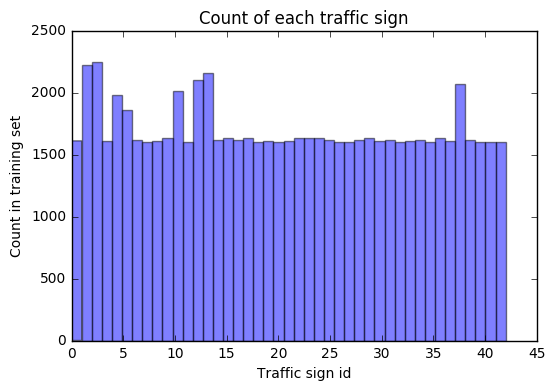

In [95]:
# Generate Samples

transforms = [
    Identity(),  # Just copy the image --- no transformation
    Rotate(),
    Translate(),
    GuassianBlur()
]

s = Sampler(transforms)
s.generate(X_train, y_train)
print("After samples generation: ")
print("X Training Set: {} samples".format(s.X_train.shape))
print("Y Training Set: {} samples".format(s.y_train.shape))
# assert s.X_train.shape[0] == s.y_train[0]

plot_distribution(s.y_train, 43)

# Shuffle samples
train, ytrain = shuffle(s.X_train, s.y_train)
train, validation, ytrain, yvalidation = train_test_split(train, ytrain, test_size=2000, random_state=42)

# Gray scale + Normaliztion transformation
preproc = Preprocess([Grayscale(), Normalizer()])
validation = preproc.applies(validation)
train = preproc.applies(train)
test = preproc.applies(X_test)

print()
print("After sample validation generation: ")
print("Training Set:   {} samples".format(train.shape))
print("Validation Set: {} samples".format(validation.shape))
print("Test Set:       {} samples".format(test.shape))

In [94]:
# save(s, 'sample1.p')
s = load('sample1.p')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. Cross-validation:
    - 80/20 split on the training data to generate a validation set. I choose a simple train-test split for the validation over more sophisticated techniques such as n-fold validation because we have plenty of data. I train on 80% of the data and then validate the accuracy of my trained model on the validation dataset. Once I am satisfied, I am testing my model against the test set.
    
2. Data generation
    - Reason: The classes are unbalanced; some classes are undersampling and therefore I am oversampling the minority class by randomly generating the following affine transformation on the images. I also think that augmenting the dataset by jittering the original dataset increase the robustness of our model; the images in the testing set might be blurry, so generating blurry image in the training set will help a lot in the training.
    - Transformation
        - Identity
        - Rotation: Randomly rotated the images between -15 to 15 degrees 
        - Translation between -2 to 2 degrees.
        - Guassian Blur that I randomly generate to similate blurry pictures. 
        - Skew transformation that I generated based on trial and error under the assumption that the images captured by the camera could be skewed for some reason.

In [57]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

keep_prob = tf.placeholder(tf.float32)

def weight_variable(shape, mean=0, stddev=0.1):
    return tf.Variable(tf.truncated_normal(shape, mean = mean, stddev = stddev))

def bias_variable(shape, val=0.):
    return tf.Variable(tf.constant(val, shape=shape))

def conv2d(x, W, padding="VALID"):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding=padding)

def max_pool_2x2(x, padding="VALID"):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding=padding)

def LeNet(x):    
    mu = 0
    sigma = 0.1
    # Layer 1: Convolutional.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Pooling: Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
# https://arxiv.org/pdf/1409.1556.pdf
def VGG(x):
    mu = 0
    sigma = 0.1  # 0.01
    
    # 1st stage 
    conv11_W = weight_variable((3, 3, 1, 32), mean=mu, stddev=sigma)
    conv11_b = bias_variable([32])
    conv11 = conv2d(x, conv11_W) + conv11_b       
    conv11 = tf.nn.relu(conv11) 
    
    conv12_W = weight_variable((3, 3, 32, 32), mean=mu, stddev=sigma)
    conv12_b = bias_variable([32])
    conv12 = conv2d(conv11, conv12_W) + conv12_b       
    conv12 = tf.nn.relu(conv12) 
    
    conv1 = max_pool_2x2(conv12)
    
    # 2nd stage: 
    conv21_W = weight_variable((3, 3, 32, 64), mean=mu, stddev=sigma)
    conv21_b = bias_variable([64])
    conv21 = conv2d(conv1, conv21_W) + conv21_b       
    conv21 = tf.nn.relu(conv21)
    
    conv22_W = weight_variable((3, 3, 64, 64), mean=mu, stddev=sigma)
    conv22_b = bias_variable([64])
    conv22 = conv2d(conv21, conv22_W) + conv22_b       
    conv22 = tf.nn.relu(conv22)   
    
    conv23_W = weight_variable((1, 1, 64, 64), mean=mu, stddev=sigma)
    conv23_b = bias_variable([64])
    conv23 = conv2d(conv22, conv23_W) + conv23_b       
    conv23 = tf.nn.relu(conv23)   

    conv2 = max_pool_2x2(conv23)
    
    # 3rd stage
    conv3_W = weight_variable((3, 3, 64, 64), mean=mu, stddev=sigma)
    conv3_b = bias_variable([64])
    conv3 = conv2d(conv2, conv3_W) + conv3_b       
    conv3 = tf.nn.relu(conv3)    
    
    # Fully connected
    fc0   = tf.concat(1, [flatten(conv3), flatten(conv2)])
    print(fc0)
    fc1_W = weight_variable((2176, 1024),  mean=mu, stddev=sigma)
    fc1_b = bias_variable([1024])
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # FC 2
    fc2_W = weight_variable((1024, 128),  mean=mu, stddev=sigma)
    fc2_b = bias_variable([128])
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Readout Layer
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture was based on the VGG architecture from the Visual Geometry Group [https://arxiv.org/pdf/1409.1556.pdf].

![title](VGG.png)

All the convolutional layers have a filter size of 3x3 and a stride size of 1 px with valid padding except in one of the configuration where we use 1x1 filter size. Similarly, we use the same configuration for the max pooling with a filter size of 2x2 with valid padding. Every hidden layer we connect a RELU activation layer.
- Conv 3x3 with depth 32 (c1)
- Conv 3x3 with depth 32 (c2)
- Max pooling 2x2        (p1)
- Conv 3x3 with depth 64 (c3)
- Conv 3x3 with depth 64 (c4)
- ** Conv 1x1 with depth 64. This layer is not captured by the figure above. ** (c5)
- Max pooling 2x2 (p2)
- Conv 3x3 with depth 64 (c6)
- Fully connected layer that reduces the number of input from 576 to 256 (fc1)
- Fully connected layer that reduces the number of input from 256 to 128 (fc2)
- Fully connected layer that classify the images. (fc3)

** Additionally, I am also connecting p2 to fc1. This idea was taken from"Traffic Sign with Multi-scale Convolutional Networks". The reasoning behind was that different layers of the network captures different features. **


In [58]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.0001
EPOCHS = 10
BATCH_SIZE = 128

# Features And Label
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = VGG(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("concat_3:0", shape=(?, 2176), dtype=float32)


In [59]:
# Model Evaluation
prediction = tf.argmax(logits, 1)   # for confusion matrix
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def predict(X_data, y_data):
    num_examples = len(X_data)
    accuracies = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(prediction, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        accuracies = np.append(accuracies, accuracy, axis=0)
    return accuracies

In [123]:
# # Training the model
saver = tf.train.Saver() # Important?

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        train, ytrain = shuffle(train, ytrain)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train[offset:end], ytrain[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.45})
        validation_accuracy = evaluate(validation, yvalidation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'VGG1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.975

EPOCH 2 ...
Validation Accuracy = 0.989

EPOCH 3 ...
Validation Accuracy = 0.992

EPOCH 4 ...
Validation Accuracy = 0.993

EPOCH 5 ...
Validation Accuracy = 0.995

EPOCH 6 ...
Validation Accuracy = 0.998

EPOCH 7 ...
Validation Accuracy = 0.997

EPOCH 8 ...
Validation Accuracy = 0.995

EPOCH 9 ...
Validation Accuracy = 0.998

EPOCH 10 ...
Validation Accuracy = 0.996

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

1. Type of optimizer
2. Batch size
3. Epochs
4. Hyperparameters

**Answer:**

1. ** AdamOptimizer: ** I am using the AdamOptimizer because I wanted my optimization to be adaptive at every step of the optimization. 
2. ** Batch size of 128: ** I tried a batch size of [64, 128, 256, 512] and noticed that the smaller the batch size the more robust is our model to overfitting. Training with a batch size ressemble closely to cross-validation.
3. ** Epochs of 10: ** I visulized the training error, validation error VS the number of epoch varying from 5 to 20 and picked 10 because the training validation error started to increase at this point.
4. ** Learning Rate of 0.0005: ** I run the program with different learning rate [0.0005, 0.001, 0.01] and choose the one that yielded the highest validation accuracy.
5. ** Valid padding ** The VGG paper suggested using valid padding. However, I noticed that filter with same padding took slower to converges and its validation accuracy was lower than valid padding. This is probably because our filter size was small 3x3 as well as our input images so the padding introduced additional noise in the system. 



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Before starting the assignment, I started reading 2 different papers:
- A paper paper on "Traffic Sign with Multi-scale Convolutional Networks" by Yann Lecunn [http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf]
- A paper on "VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION" by Karen Simonyan and Andrew Zisserman. [https://arxiv.org/pdf/1409.1556.pdf]

Initially, I started using the VGG model as described in the VGG paper out of the box with 5 max pooling layers, 10 conv net layers and 3 fully connected layers. My model yield 85% validation accuracy using 40 EPOCHS. After closer inspection, I identified several problems. First and foremost the paper is using a 224x224 image whereas I am using a 32x32 images. I realized that I should either convert my input to 224x224 or reduce the complexity of my model. I choose the later. Second, the VGG started bootstraped the weight initialization by training simpler model and using the weights of the simpler model. 

I decided to start with Lenet and increase the complexity little by little

1. LeNet5 with a validation accuracy of 94%
2. ** 1st iteration: ** I am modifying LetNet to have 3 max pool layers, 3 conv net layer, and 3 fully connected layer. I obtained 2% improment in validatino accuracy (96%)
    - Conv Net 3x3
    - Max pool 2x2
    - Conv Net 3x3
    - Max pool 2x2 
    - Conv Net 3x3
    - Max pool 2x3
    - Fully connected layer
    - Fully connected layer
    - Readout layer

3. ** 2nd iteration ** with a validation accuracy of 98%
    - Conv Net 3x3
    - Conv Net 3x3 
    - Max pool 2x2 
    - Conv Net 3x3
    - Conv Net 3x3
    - Max pool 2x2
    - Conv Net 3x3
    - Conv Net 3x3
    - Conv Net 1x1
    - Fully connected layer
    - Fully connected layer
    - Readout layer

4. ** Depth of each layer ** Adjusting the depth of each layer was one of the most challenging part of the problem. I initially started with a depth of 64 and double the depth after each max pooling layer. The approach was not very successful because it reduce the validation accuracy. I then tried to decrease the depth of the network in the fully connected network by a factor of 2 to reduce the dimensionality before the readout layer. This approach was more successfull and helped me achieve a validation accuracy of 99% accuracy.

5. ** Data augmentation ** After several experimentation, I ended up removing the skewing operation and only used:
    - Translation by -2 to 2
    - Rotation between -15 to 15
    - Identity
    - Guassian blur of {3,5,7}
    Augmenting the data improved the "General Caution" class significantly and increased the validation error to 99.6%.

6. ** Connecting all the pooling layer to the fully connected layer ** I also got an inspiration from the "Traffic Sign with Multi-scale Convolutional Networks" and tried to connect intermediate hidden layer to the fully connected layer. This increased the validation layer to 99.6%. 

Once I was satisfied with my results, I went back and tested the different iterations against the test dataset. The results are summarized in the following table:

<pre>
```

| Iteration | Validation Accuracy  |  Test Accuracy  |
|-----------|----------------------|-----------------|
|   1       |         94.1%        |        91.2%    |
|-----------|----------------------|-----------------|
|   2       |         96.0%        |        93.4%    |
|-----------|----------------------|-----------------|
|   3       |         97.8%        |        96.0%    |
|-----------|----------------------|-----------------|
|   4       |         99.1%        |        96.8%    |
|-----------|----------------------|-----------------|
|   5       |         99.5%        |        97.4%    |
|-----------|----------------------|-----------------|
|   6       |         99.6%        |        98.2%    |
|-----------|----------------------|-----------------|
```
</pre>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

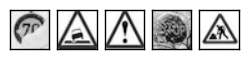

In [60]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
myimages_path = ['70.jpg', 'pothole.jpg', 'general_caution.jpg', 'STOP.jpg', 'road-work2.jpg']
mylabels = ['4', '43', '18', '14', '25']
myimages = []

# Loading images
for i, filename in enumerate(myimages_path):
    if filename.endswith(".jpg"):
        img = cv2.imread('{}/{}'.format('Dataset', filename))
        gimg = preproc.apply(img)
        plt.subplot(1, 10, i+1)
        plt.imshow(gimg.reshape(32, 32), cmap='gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        myimages.append(gimg)

In [133]:
print('Testing ...')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(myimages, mylabels)
    mypredictions = predict(myimages, mylabels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
for i, ypred in enumerate(mypredictions):
    print('True Label/Predicted: {}/{}'.format(class_names.get(str(mylabels[i])), class_names.get(str(int(ypred)))))

Testing ...
Test Accuracy = 0.200
True Label/Predicted: Speed limit (70km/h)/Speed limit (20km/h)
True Label/Predicted: None/Beware of ice/snow
True Label/Predicted: General caution/General caution
True Label/Predicted: Stop/Keep right
True Label/Predicted: Road work/Children crossing


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._


**Answer:** 

I choose the following images:
1. Speed limit (70km/h) covered with snow. This image will be particularly challenging because half of the sign is hidden. I would expect it to be confused with 20km/h.
2. Pothole sign which did not exist in the class labels. Since there were no training data with "pothole" sign 
I am expecting the classifier to choose the one that it ressemble the most.
3. General caution with a pretty good quality. It will be predicted correctly.
4. A stop sign cover of snow and partially hidden in the branches. Similarly like the speed limit sign the classifier will have difficulties classifying this traffic sign because there are a lot of background noise.
5. Road work which has a good quality but has the worker in the traffic sign is pointed to the left. In the dataset the worker is pointed to the opposite side (right). Technically, we have never seen similar examples.


In [127]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.982


Confusion matrix, without normalization
[[ 60   0   0 ...,   0   0   0]
 [  1 716   0 ...,   0   0   0]
 [  0   2 743 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  79   0   0]
 [  0   0   0 ...,   0  53   0]
 [  0   0   0 ...,   0   2  88]]


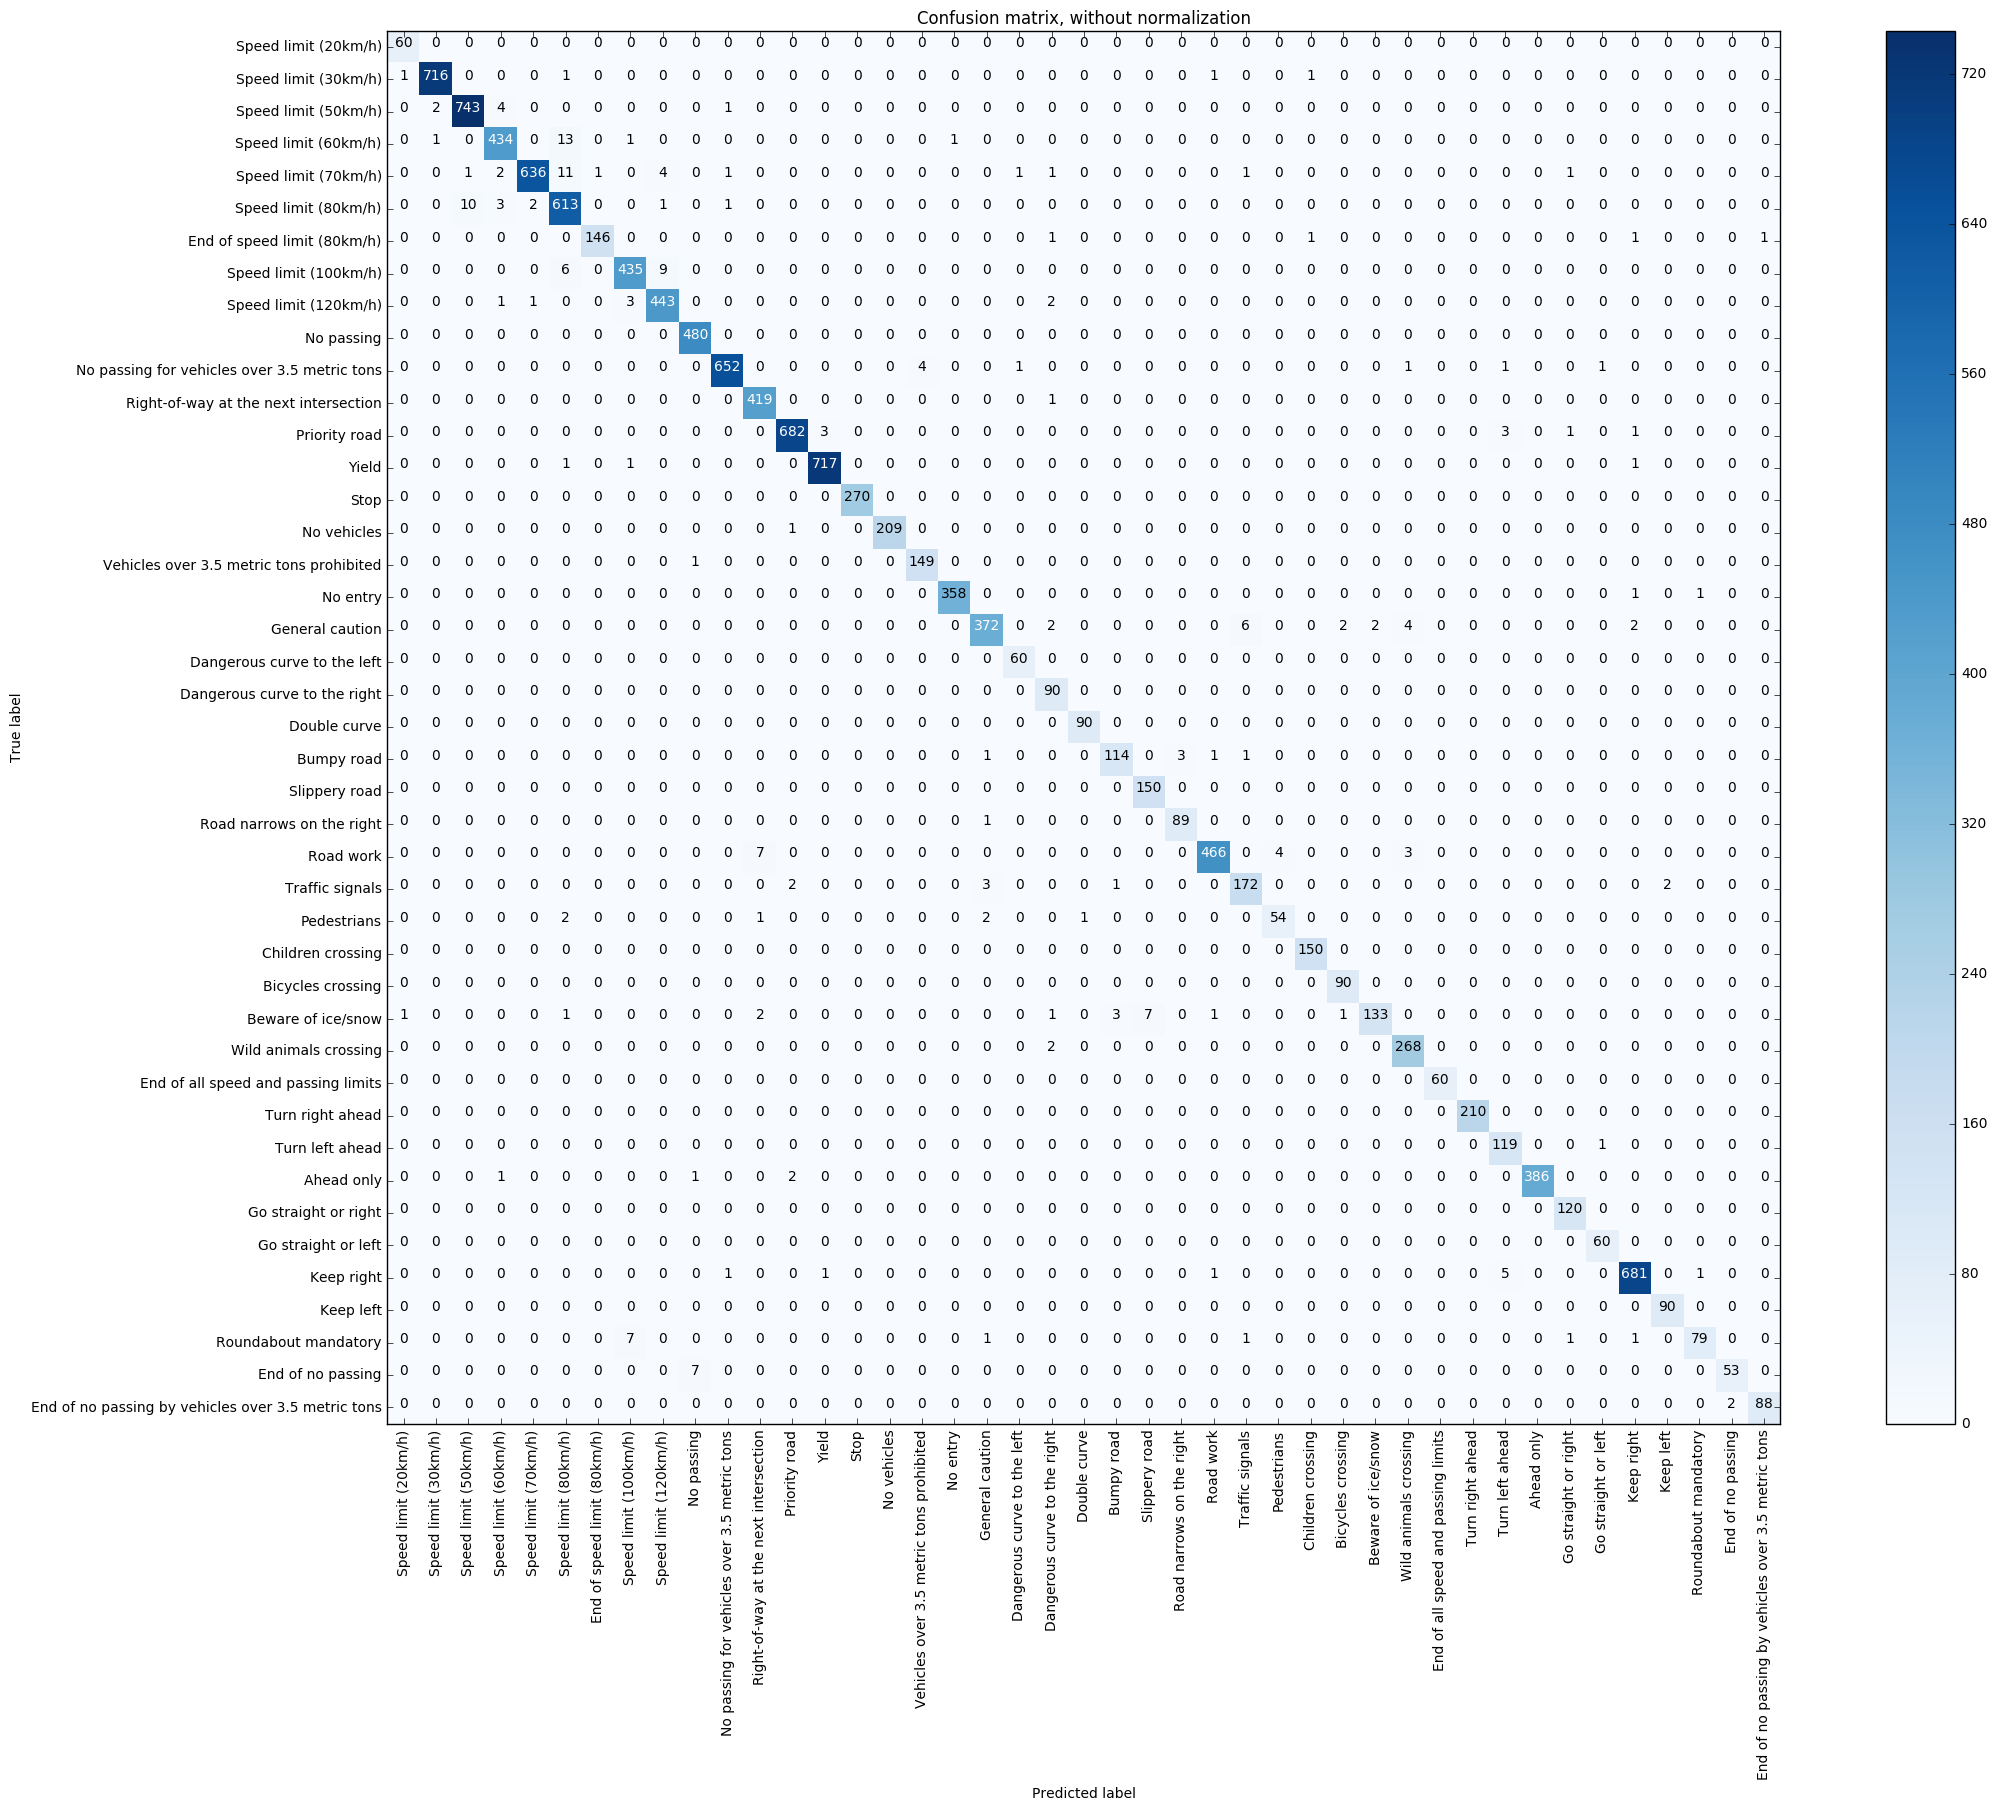

In [128]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = predict(test, y_test)
    
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(24, 18))
classes = [int(value) for value in class_names.keys()]
classes.sort()
classes = [ class_names[str(value)] for value in classes ]
plot_confusion_matrix(cm, classes=classes, title='Confusion matrix, without normalization')

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I am performing 98.2% accuracy on the test dataset. Looking at the confusion matrix, my model is performing well and I suspect that the 2% error is probably because of the quality of the images. 

Against the captured images from the web, I am performing 20% which leads  me to think that my model is overfitting the German Traffic signal. To be fair I would agree that I picked 4 difficult images to classify (unseen dataset, sign covered by snow, sign hidden)

In [134]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
k = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    ypreds = tf.nn.softmax(logits)
    softmax = sess.run(tf.nn.top_k(ypreds, k=k), feed_dict= { x: myimages, keep_prob: 1.0 } )
    
indices = softmax.indices
values = softmax.values
top_k = np.arange(k)

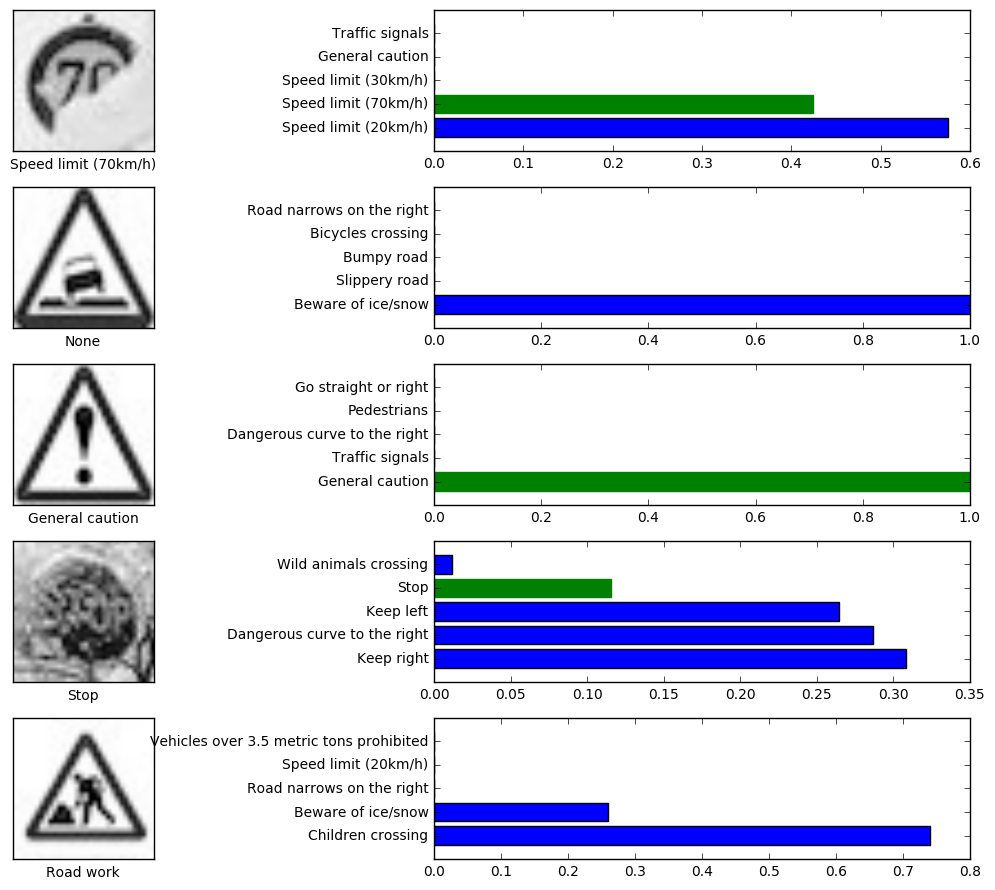

In [135]:
f = plt.figure(figsize=(12, 9))
for idx, gimg in enumerate(myimages):
    ax = f.add_subplot(5, 2, 2*(idx+1)-1)
    ax.imshow(gimg.reshape(32, 32), cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.xlabel(class_names.get(str(mylabels[idx])))

    plt.tight_layout()
    
    ax = f.add_subplot(5, 2, 2*(idx+1))
    ax.barh(top_k, values[idx], align='center')
    plt.yticks(top_k, [class_names.get(str(indices[idx][k])) for k in top_k])

    for k in top_k:
        if int(indices[idx][k]) == int(mylabels[idx]):
            ax.get_children()[k].set_color('g')

    plt.tight_layout()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
1. SPEED LIMIT 70 MPH: As expected 70km/h and 20km/h are mixed up because it's covered in snow. The correct prediction was #2 in the top 5. 
2. POTHOLE SIGN: The sign is not in the training set and hence it's prediction is the top 5. Interestingly, it did not pick "Slippery road" or "bumpy road" which closely ressemble the picture. 
3. GENERAL CAUTION: The model was very confident of its answer because the image was clear and centered. It predicted with 100% confidence its answer. 
4. STOP SIGN: The stop sign covered in snow in the branches had it correct in top 5 but did not correctly classify the sign.
5. ROAD SIGN: The model was not able to predict the flipped road side. The correct answer was not in the top 5, however it predicted it as "Children Crossing" which closely resemble the picture.

These are my propositions to address these mistakes:
1. Speed limit 70% covered with snow - Simplify the model by not performing the data augmentation.
2. Flipped road work sign - Include 180degree rotation to capture flipped road sign.
3. STOP sign covered with snow and in the branches: I could simplify the model by no t performing a data augmentation.

Doing so increased my test accuracy from 20% to 80% [From web]
And decrease my German Test dataset from 98.2 to 97.4

** 5 Best softmax in the testing set **

Here I randomly sample the German test dataset and plotted the best 5 softmax. As expected the images are centered and readable.

In [139]:
k = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    ypreds = tf.nn.softmax(logits)
    softmax = sess.run(tf.nn.top_k(ypreds, k=k), feed_dict= { x: test[:5000], keep_prob: 1.0 } )
    
indices = softmax.indices
values = softmax.values
top_k = np.arange(k)
sorted_indices = np.argsort(np.array(values)[:, 0])

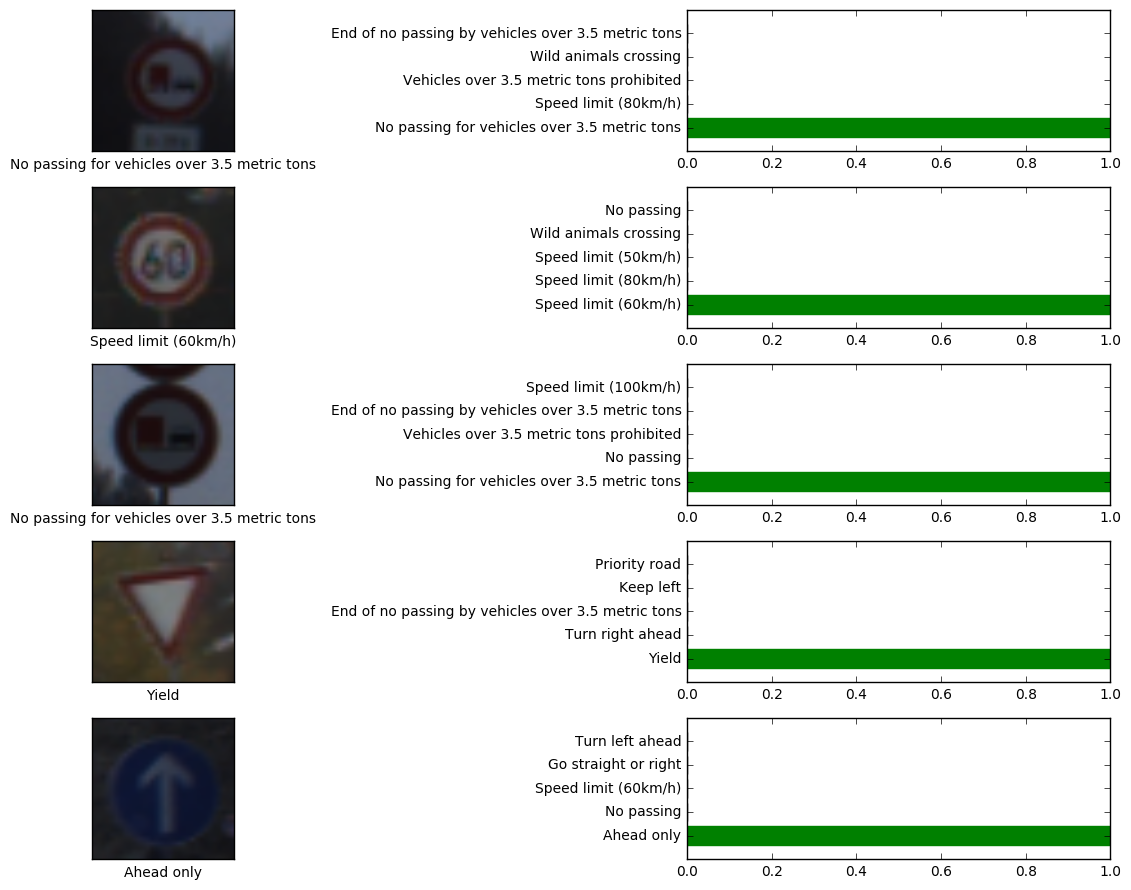

In [140]:
# best softmax
plot_softmax(sorted_indices[-5:])

** 5 worst softmax in the testing set **

Here I randomly sample the German test dataset and plotted the least 5 softmax. Interestingly, 4 out of 5 have correct 
prediction and only the non-centered image was misclassified. This suggest that increasing the translation factor might yield a higher accuracy.

In [62]:
# Worst softmax
plot_softmax(sorted_indices[:5])

![title](worst-softmax.png)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.